## Rahul Krishna K

## GRIP - Data Science and Business Analytics  Task 3

### Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

## --------------------------------------------------------------------------------

### Importing the required libreary 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [3]:
data_set = pd.read_csv(r'C:\Users\Rahul K\OneDrive\Desktop\git\SampleSuperstore.csv')

In [4]:
data_set.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Preprocessing

In [5]:
# To check row and column count
data_set.shape

(9994, 13)

In [6]:
data_set.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
data_set.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
# Check for null values in the dataset
data_set.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
data_set['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [10]:
# We are droping the country column because the data set has only one county

data_set.drop('Country',axis = 1)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [11]:
data_set['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [12]:
## we can observe that there are three classes 

## Now we need to have a count the types and number of subclasses
print(data_set['Sub-Category'].nunique())
data_set['Sub-Category'].value_counts()

17


Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

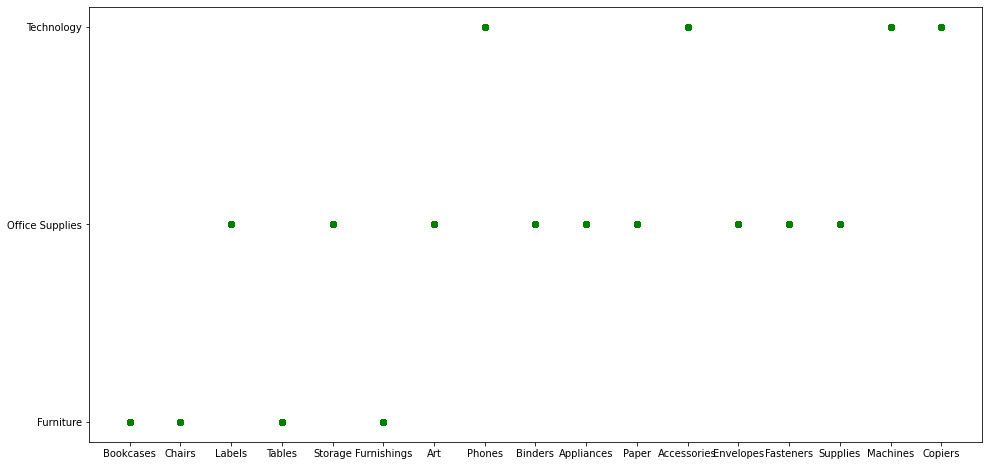

In [13]:
## We can observe that there are a total of 17 unique features and all the count is also present

#Lets see how sub-categories are distributed w-r-t to category
plt.figure(figsize=(16,8))

plt.scatter('Sub-Category','Category',data=data_set,color='g')



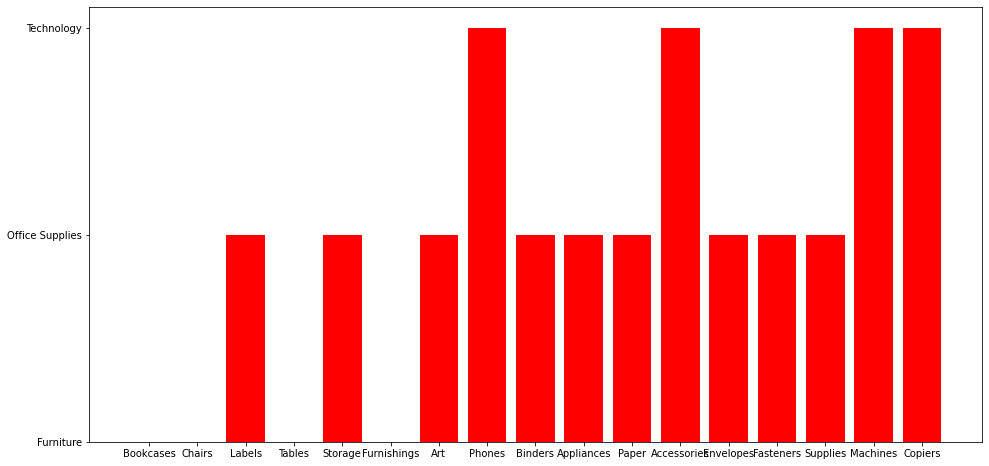

In [14]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=data_set,color='r')
plt.show()

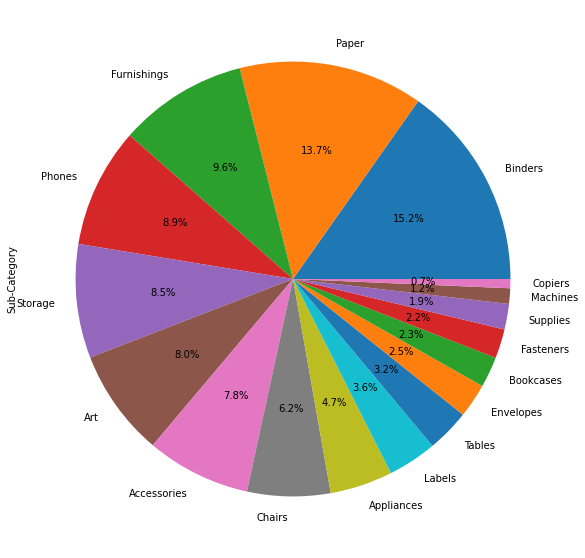

In [15]:
plt.figure(figsize=(12,10))
data_set['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Profit and sales of sub-category 

Text(0, 0.5, 'Profit and sales')

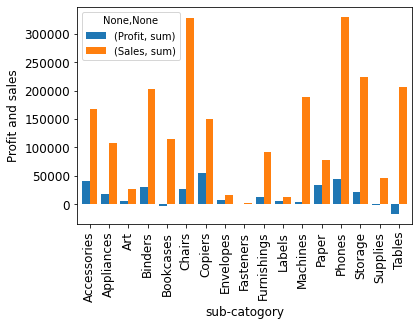

In [30]:
data_set.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).head(30).plot.bar(width=0.8, fontsize = 12)
plt.xlabel("sub-catogory", fontsize=12)
plt.ylabel("Profit and sales", fontsize=12)

### Compute cost to find out the profit percentage

In [18]:
## Now lets compute cost

## CP  = SP - Profit 

data_set['Cost'] = data_set['Sales'] - data_set['Profit'] 

In [19]:
data_set.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516


In [20]:
# Now lets calculate the profit % 

data_set['Profit %'] = (data_set['Profit']/data_set['Cost'])/100

In [21]:
data_set.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,220.0464,0.001905
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,512.3580,0.004286
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.7486,0.008868
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,1340.6085,-0.002857
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,19.8516,0.001268


In [22]:
data_set['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

### Count of Sub-Category to each region

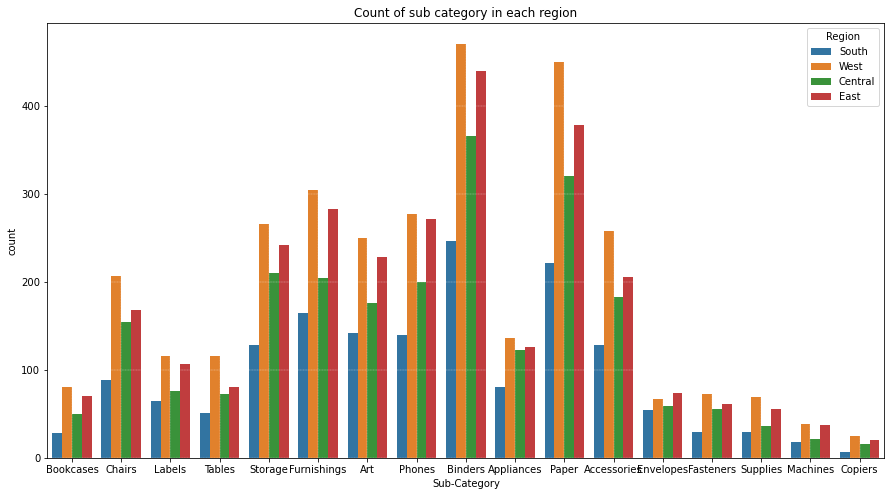

In [35]:
fig=plt.figure(figsize=(15,8))
sns.countplot(data = data_set, x = 'Sub-Category', hue = 'Region')
plt.title("Count of sub category in each region")
plt.grid(color = 'white', linestyle = '--', linewidth=0.3)


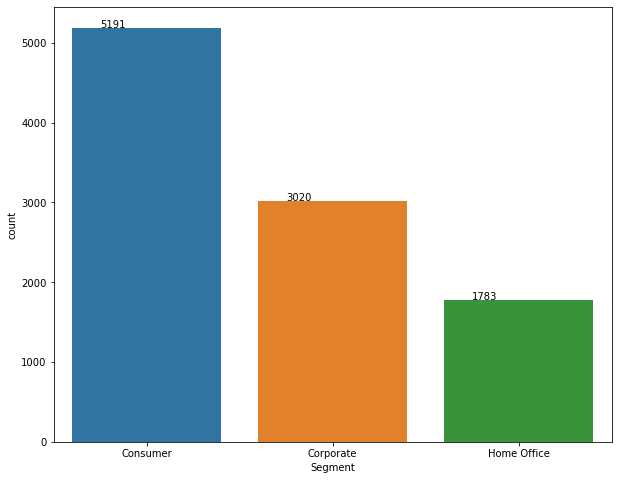

In [23]:
fig=plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
s=sns.countplot('Segment', data = data_set)
for s in ax.patches:
    ax.annotate('{:.0f}'.format(s.get_height()), (s.get_x()+0.15, s.get_height()+1))
plt.show()

### States with highest profit

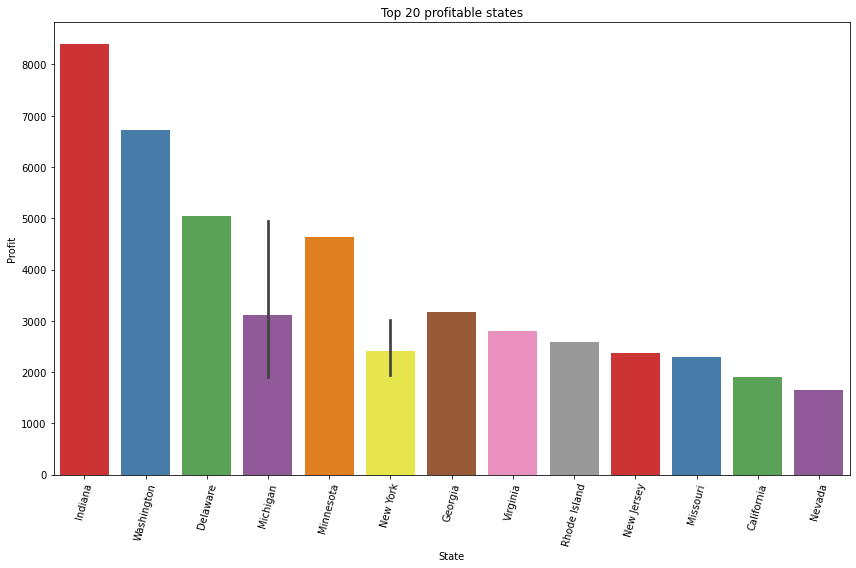

In [37]:
sortedTop20 = data_set.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='State', y='Profit',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable states")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

### States with least profit or highest loss

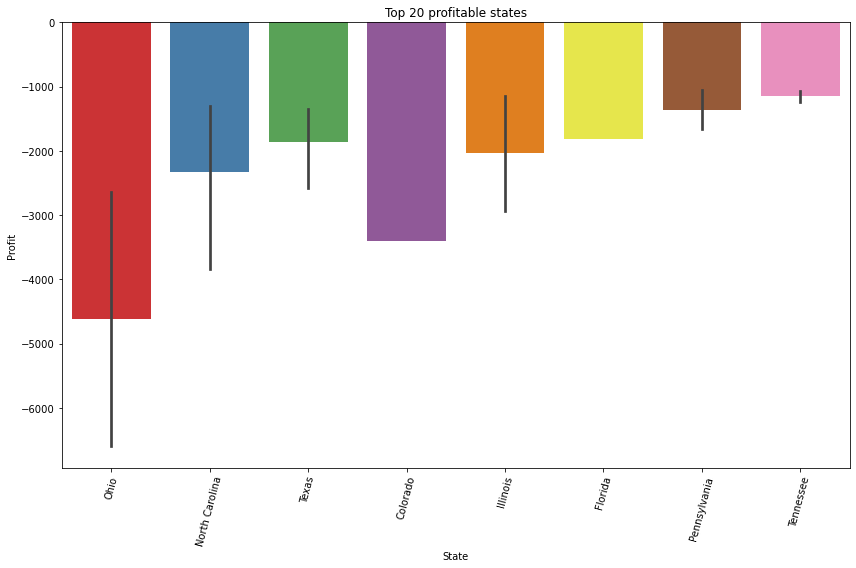

In [25]:
sortedTop20 = data_set.sort_values(['Profit'], ascending=True).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='State', y='Profit',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("Top 20 profitable states")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

In [26]:
state_profit = data_set.groupby('State')['City','Profit','Sales'].agg(['sum'])
city_profit = data_set.sort_values(by=['City', 'Profit'])

In [53]:
city_profit.groupby('City')['Profit','Sales'].agg(['sum'])

,Profit,Sales
,sum,sum
City,,
Aberdeen,6.6300,25.500
Abilene,-3.7584,1.392
Akron,-186.6356,2729.986
Albuquerque,634.0881,2220.160
Alexandria,318.6183,5519.570
...,...,...
Woonsocket,78.6791,195.550
Yonkers,2767.7557,7657.666


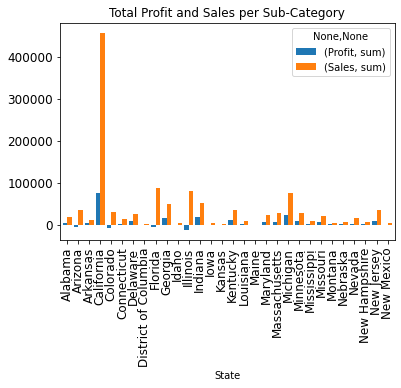

In [27]:
city_profit.groupby('State')['City','Profit','Sales'].agg(['sum']).head(30).plot.bar(width=0.8, fontsize = 12)
plt.title('Total Profit and Sales per Sub-Category')

plt.show()

* from the above graph we can observe that even though  many states have good number sales the profit is not that high 
* In some states eventhough the sale is high we see less profit
* When we observed sales vs sub-category we saw some had less profit that might be the reason for less profit 

### Segment wise profitable sub-category product

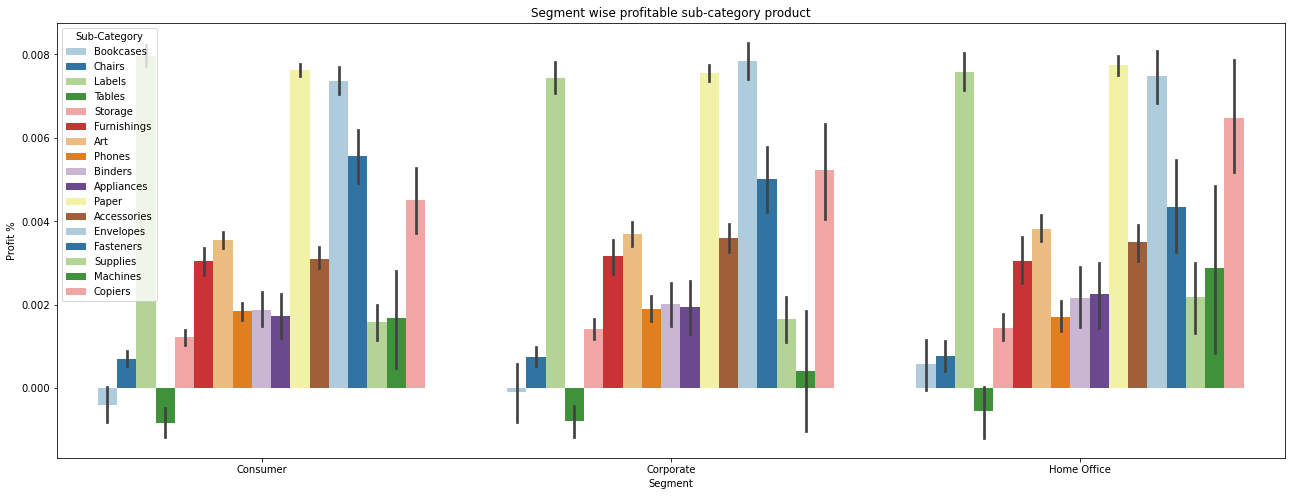

In [39]:
fig= plt.figure(figsize = (22,8))
q1 = fig.add_subplot(111)
sns.barplot('Segment','Profit %', hue = 'Sub-Category',palette = 'Paired', data = data_set)
for i in q1.patches:
    ax.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.15, i.get_height()+1))
plt.title('Segment wise profitable sub-category product')
plt.show()